In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

In [ ]:
url = "http://www.football-data.co.uk/mmz4281/2021/E0.csv"

In [ ]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("england21.csv.csv")

In [38]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [39]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,E0,19/04/2021,20:00,Leeds,Liverpool,1,1,D,0,1,...,2.54,1.00,1.92,2.01,1.93,2.00,2.02,2.05,1.90,1.98
316,E0,20/04/2021,20:00,Chelsea,Brighton,0,0,D,0,0,...,1.66,-0.75,1.91,1.99,1.92,2.01,1.98,2.07,1.90,1.99
317,E0,21/04/2021,18:00,Tottenham,Southampton,2,1,H,0,1,...,2.13,-0.50,1.88,2.05,1.86,2.07,1.90,2.08,1.86,2.03
318,E0,21/04/2021,20:15,Aston Villa,Man City,1,2,A,1,2,...,2.14,1.50,1.92,2.01,1.93,2.00,2.01,2.06,1.90,1.99


In [40]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date', 'Time'],axis=1)
# res_14 = df_14.ix[:,:23]

# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date', 'Time'],axis=1)
bet_16 = df.iloc[:,23:]

In [41]:
res_16.head()
feature_table = df.iloc[:,:23]

In [42]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
315,Leeds,Liverpool,1,1,D,0,1,A,A Taylor,12,17,5,7,17,15,10,8,2,1,0
316,Chelsea,Brighton,0,0,D,0,0,D,S Attwell,7,11,4,2,8,9,0,3,2,0,0
317,Tottenham,Southampton,2,1,H,0,1,A,D Coote,12,10,3,5,10,14,5,5,2,1,0
318,Aston Villa,Man City,1,2,A,1,2,A,P Bankes,8,13,3,3,12,7,1,11,0,1,1
319,Leicester,West Brom,3,0,H,3,0,H,A Madley,17,4,7,1,13,12,7,3,0,2,0


In [43]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [44]:
res_16 = res_16[:-10]
res_16.shape[0]

310

In [45]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.335483870967742
Average number of goals away 1.332258064516129
Average number of goals conceded at home 1.332258064516129
Average number of goals conceded away 1.335483870967742


In [46]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')
res_home.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0
1,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0
2,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0
3,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0
4,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arsenal,Wolves,1,2,A,1,2,A,M Oliver,13,11,2,5,13,13,8,4,3,4,0
96,Leicester,Fulham,1,2,A,0,2,A,S Hooper,16,10,3,5,9,21,6,5,0,2,0
97,West Ham,Aston Villa,2,1,H,1,1,D,P Bankes,6,16,2,6,20,7,3,7,1,1,0
98,Burnley,Everton,1,1,D,1,1,D,A Taylor,8,13,3,6,6,9,8,4,0,0,0


In [47]:
# list(res_home)[0]

In [48]:
table_16.Team = list(res_home.groups.keys())
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,18,25,NaN,NaN,18,17,NaN,NaN
1,Aston Villa,23,20,NaN,NaN,19,14,NaN,NaN
2,Brighton,16,17,NaN,NaN,19,19,NaN,NaN
3,Burnley,13,12,NaN,NaN,18,24,NaN,NaN
4,Chelsea,27,23,NaN,NaN,16,15,NaN,NaN
5,Crystal Palace,16,17,NaN,NaN,25,27,NaN,NaN
6,Everton,20,21,NaN,NaN,23,15,NaN,NaN
7,Fulham,9,15,NaN,NaN,24,18,NaN,NaN
8,Leeds,21,28,NaN,NaN,18,31,NaN,NaN
9,Leicester,25,30,NaN,NaN,21,16,NaN,NaN


In [49]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [50]:
table_16.Team = list(res_home.groups.keys())
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,18,25,0.869565,1.210654,18,17,0.871671,0.821256
1,Aston Villa,23,20,1.111111,0.968523,19,14,0.920097,0.676329
2,Brighton,16,17,0.772947,0.823245,19,19,0.920097,0.917874
3,Burnley,13,12,0.628019,0.581114,18,24,0.871671,1.159420
4,Chelsea,27,23,1.304348,1.113801,16,15,0.774818,0.724638
5,Crystal Palace,16,17,0.772947,0.823245,25,27,1.210654,1.304348
6,Everton,20,21,0.966184,1.016949,23,15,1.113801,0.724638
7,Fulham,9,15,0.434783,0.726392,24,18,1.162228,0.869565
8,Leeds,21,28,1.014493,1.355932,18,31,0.871671,1.497585
9,Leicester,25,30,1.207729,1.452785,21,16,1.016949,0.772947


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


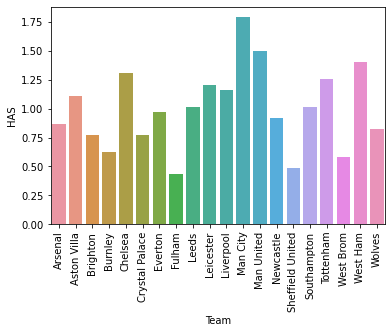

In [51]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [52]:
table_16[table_16.Team == "Southampton"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Southampton,21,18,1.014493,0.871671,20,36,0.968523,1.73913


In [53]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [54]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Fulham,Arsenal,A,2,6,0.434783,1.162228,1.210654,0.821256
1,Crystal Palace,Southampton,H,3,5,0.772947,1.210654,0.871671,1.739130
2,Liverpool,Leeds,H,6,3,1.159420,0.920097,1.355932,1.497585
3,West Ham,Newcastle,A,3,2,1.400966,0.968523,0.629540,1.256039
4,West Brom,Leicester,A,1,7,0.579710,1.598063,1.452785,0.772947
5,Tottenham,Everton,A,5,4,1.256039,0.823245,1.016949,0.724638
6,Brighton,Chelsea,A,3,5,0.772947,0.920097,1.113801,0.724638
7,Sheffield United,Wolves,A,2,4,0.483092,1.210654,0.677966,1.111111
8,Everton,West Brom,H,7,4,0.966184,1.113801,0.774818,1.256039
9,Leeds,Fulham,H,7,6,1.014493,0.871671,0.726392,0.869565


In [55]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [56]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [57]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
300,Fulham,Wolves,A,3,3,0.434783,1.162228,0.677966,1.111111,-1
301,Man City,Leeds,A,7,2,1.787440,0.726392,1.355932,1.497585,-1
302,Liverpool,Aston Villa,H,10,5,1.159420,0.920097,0.968523,0.676329,1
303,Crystal Palace,Chelsea,A,1,10,0.772947,1.210654,1.113801,0.724638,-1
304,Burnley,Newcastle,A,4,5,0.628019,0.871671,0.629540,1.256039,-1
305,West Ham,Leicester,H,4,5,1.400966,0.968523,1.452785,0.772947,1
306,Tottenham,Man United,A,3,7,1.256039,0.823245,1.452785,0.676329,-1
307,Sheffield United,Arsenal,A,2,5,0.483092,1.210654,1.210654,0.821256,-1
308,West Brom,Southampton,H,6,4,0.579710,1.598063,0.871671,1.739130,1
309,Brighton,Everton,D,3,1,0.772947,0.920097,1.016949,0.724638,0


In [58]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [60]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [61]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.51612903 0.51612903 0.5483871  0.61290323 0.58064516 0.48387097
 0.58064516 0.61290323 0.64516129 0.48387097]
0.5580645161290322


In [62]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())


[0.61290323 0.48387097 0.41935484 0.5483871  0.58064516 0.4516129
 0.64516129 0.64516129 0.64516129 0.4516129 ]
0.5483870967741935


In [63]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.58064516 0.61290323 0.61290323 0.61290323 0.67741935 0.61290323
 0.58064516 0.61290323 0.58064516 0.5483871 ]
0.603225806451613


In [64]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)

print(scores.mean())

[03:33:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:33:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [65]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [66]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [67]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Man City','Leeds United','D',0,0,0,0,0,0],
                             ['Fulham','Wolves','D',0,0,0,0,0,0],
                             ['Liverpool','Aston Villa','D',0,0,0,0,0,0],
                             ['Cristal Palace','Chelsea','D',0,0,0,0,0,0],
                             ['Burnley','Newcastle','D',0,0,0,0,0,0],
                             ['West Ham','leicester City','D',0,0,0,0,0,0],
                             ['Tottenham','Man United','D',0,0,0,0,0,0],
                             ['Sheffield United','Southampton','D',0,0,0,0,0,0],
                             ['Brighton','Everton','D',0,0,0,0,0,0],
                             ['Everton','Tottenham','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [68]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(320, 9)

In [69]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [70]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
319,Man City,Leeds United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
318,Fulham,Wolves,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
317,Liverpool,Aston Villa,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
316,Cristal Palace,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
315,Burnley,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
314,West Ham,leicester City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
313,Tottenham,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
312,Sheffield United,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
311,Brighton,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
310,Everton,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# for index,row in feat_table.iterrows():
#     print(row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])

Man City 1.7910447761194028
Fulham 0.4477611940298507
Liverpool 1.0945273631840795


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# # Adding k recent performance metrics. Change value of k.
# k = 4
# for i in range(feat_table.shape[0]-1,-1,-1):
#     row = feat_table.loc[i]
#     ht = row.HomeTeam
#     at = row.AwayTeam
#     ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
#     at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
#     feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
#     feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
#     feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
#     feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
#     feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

# f_HAS = []
# f_HDS = []
# f_AAS = []
# f_ADS = []
# for index,row in feat_table.iterrows():
#     #print row
#     f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
#     f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
#     f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
#     f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
# feat_table['HAS'] = f_HAS
# feat_table['HDS'] = f_HDS
# feat_table['AAS'] = f_AAS
# feat_table['ADS'] = f_ADS

In [ ]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.loc[i, 'pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
#     feat_table.loc[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
#     feat_table.loc[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
#     feat_table.loc[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
#     feat_table.loc[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
#     feat_table.loc[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    
    feat_table['pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
    feat_table[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
    feat_table[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
    feat_table[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
    feat_table[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
    feat_table[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values.astype(str).astype(float))
    
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values.astype(str).astype(float))
   
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values.astype(str).astype(float))
    
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values.astype(str).astype(float))
    
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS
feat_table

<ipython-input-77-a991538b9462>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
<ipython-input-77-a991538b9462>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)


In [ ]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.at['pastHC'] = [ (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k] 
    feat_table['pastAC'] = [i, (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k]
    feat_table['pastHS'] = [i, (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k]
    feat_table['pastAS'] = [i, (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k]
    feat_table['pastHG'] = [i, (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k]
    feat_table['pastAG'] = [i, (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k]

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

In [ ]:
feat_table.set_index('id', inplace=True)

In [ ]:
len(feat_table.index)

In [106]:
feat_table.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HS', 'AS', 'HC', 'AC',
       'pastHS', 'pastHC', 'pastAS', 'pastAC', 'pastHG', 'pastAG', 'HAS',
       'HDS', 'AAS', 'ADS'],
      dtype='object')

In [107]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)


In [108]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [109]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(310, 19)


300

In [110]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [111]:
### Try predictions here too.

In [112]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [113]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

300


In [114]:
test_table = test_table.fillna(0)

In [115]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Fulham,Arsenal,A,0.0,0.0,0.0,0.0,0.0,0.0,1.791045,0.658228,1.518987,0.39801,-1,0.0,0.0,0.0
1,Crystal Palace,Southampton,H,0.0,0.0,0.0,0.0,0.0,0.0,1.791045,0.658228,1.518987,0.39801,1,0.0,0.0,0.0
2,Liverpool,Leeds,H,0.0,0.0,0.0,0.0,0.0,0.0,1.791045,0.658228,1.518987,0.39801,1,0.0,0.0,0.0
3,West Ham,Newcastle,A,0.0,0.0,0.0,0.0,0.0,0.0,1.791045,0.658228,1.518987,0.39801,-1,0.0,0.0,0.0
4,West Brom,Leicester,A,0.0,0.0,0.0,0.0,0.0,0.0,1.791045,0.658228,1.518987,0.39801,-1,0.0,0.0,0.0


In [116]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [117]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
300,-1.1875,-0.3750,3.0000,1.791045,0.658228,1.518987,0.39801
301,-1.0625,0.3125,2.0625,1.791045,0.658228,1.518987,0.39801
302,-1.3750,-0.3750,4.0625,1.791045,0.658228,1.518987,0.39801
303,-1.3125,0.0000,2.3750,1.791045,0.658228,1.518987,0.39801
304,0.0000,0.5000,4.2500,1.791045,0.658228,1.518987,0.39801
305,-1.3125,0.1875,4.0625,1.791045,0.658228,1.518987,0.39801
306,-1.8750,-0.3125,-0.3125,1.791045,0.658228,1.518987,0.39801
307,-1.0000,0.0000,1.8750,1.791045,0.658228,1.518987,0.39801
308,-1.3750,0.0000,3.0000,1.791045,0.658228,1.518987,0.39801
309,0.0000,0.6250,1.6875,1.791045,0.658228,1.518987,0.39801


In [118]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [119]:
print(X_train.dtypes)

pastCornerDiff    float64
pastGoalDiff      float64
pastShotsDiff     float64
HAS               float64
HDS               float64
AAS               float64
ADS               float64
dtype: object


In [120]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:51:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[03:51:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[03:51:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

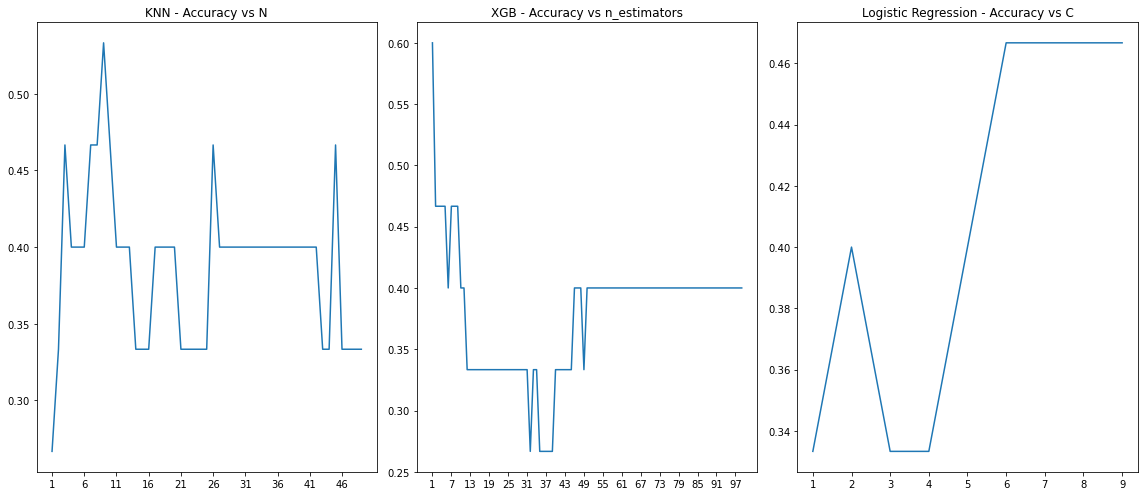

In [121]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [122]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.5333333333333333 8
0.6 1
0.4666666666666667 5


In [123]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

[03:53:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [124]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [125]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [126]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
300,Everton,Tottenham,-1,0,-1
301,Brighton,Everton,0,-1,1
302,Sheffield United,Southampton,-1,-1,-1
303,Tottenham,Man United,-1,0,1
304,West Ham,leicester City,-1,0,-1
305,Burnley,Newcastle,-1,-1,-1
306,Cristal Palace,Chelsea,1,0,1
307,Liverpool,Aston Villa,1,-1,-1
308,Fulham,Wolves,-1,0,-1
309,Man City,Leeds United,1,0,1


In [127]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [129]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [130]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.5333333333333333 0.6 0.4666666666666667


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
300,Everton,Tottenham,A,D,A
301,Brighton,Everton,D,A,H
302,Sheffield United,Southampton,A,A,A
303,Tottenham,Man United,A,D,H
304,West Ham,leicester City,A,D,A
305,Burnley,Newcastle,A,A,A
306,Cristal Palace,Chelsea,H,D,H
307,Liverpool,Aston Villa,H,A,A
308,Fulham,Wolves,A,D,A
309,Man City,Leeds United,H,D,H
